In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [83]:
data=pd.read_csv("co_properties.csv")
data.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [84]:
data

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,...,4.0,NaN,NaN,7.000000e+08,COP,NaN,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta


In [85]:
"""
Id : Id of property
l1 : Country
l2 : Department
l3 : City
l4 : Zone
l5 : Locality
l6 : Neighborhood
'ad_type':Property, 
'start_date'
'end_date'
'created_on'
'lat'
'lon'
'rooms'
'bedrooms'
'bathrooms',
'surface_total'
'surface_covered'
'price':price
'currency':type of money
'price_period':the period of proce
'title':name 
'description'
'property_type':Apartment,house, farm, etc
'operation_type':Sale, Rent, etc
"""

"\nId : Id of property\nl1 : Country\nl2 : Department\nl3 : City\nl4 : Zone\nl5 : Locality\nl6 : Neighborhood\n'ad_type':Property, \n'start_date'\n'end_date'\n'created_on'\n'lat'\n'lon'\n'rooms'\n'bedrooms'\n'bathrooms',\n'surface_total'\n'surface_covered'\n'price':price\n'currency':type of money\n'price_period':the period of proce\n'title':name \n'description'\n'property_type':Apartment,house, farm, etc\n'operation_type':Sale, Rent, etc\n"

#### Checking the property type

In [86]:
data["property_type"].value_counts()

Apartamento        565404
Casa               220101
Otro               111046
Lote                46369
Local comercial     26389
Oficina             22258
Finca                6725
Depósito             1544
Parqueadero           164
Name: property_type, dtype: int64

#### Apartaments

In [87]:
apartments=data[data["property_type"]=="Apartamento"]
null_values=apartments.isnull().sum()/len(apartments)*100
print(null_values.sort_values())
percetage_50=[]
for column in null_values.index:
    if null_values[column]>50:
        percetage_50.append(column)
apartments=apartments.drop(columns=percetage_50)
apartments= apartments.dropna(how='any')
apartments

id                  0.000000
property_type       0.000000
l2                  0.000000
l1                  0.000000
operation_type      0.000000
end_date            0.000000
start_date          0.000000
ad_type             0.000000
created_on          0.000000
title               0.000531
price               0.039618
currency            0.043686
description         0.055712
l3                  3.999972
bathrooms          13.003445
lat                30.082560
lon                30.082560
bedrooms           57.753571
l4                 68.504821
rooms              79.403931
l5                 82.429378
price_period       89.249811
l6                 93.147378
surface_covered    93.938847
surface_total      96.458285
dtype: float64


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
3326,SpT+hcNb3UQKQiqxW1Ligw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.328000,-76.639000,Colombia,Valle del Cauca,Cali,7.0,980000000.0,COP,"HERMOSO PENTHOUSE EN VENTA, SECTOR PANCE","HERMOSO APARTAMENTO TIPO PENT HOUSE, CON UNA L...",Apartamento,Venta
3552,Gz4dnC8SncBA0th/LCzATQ==,Propiedad,2020-10-07,2020-10-14,2020-10-07,3.449279,-76.495346,Colombia,Valle del Cauca,Cali,1.0,97000000.0,COP,VENTA APARTAMENTO LA BASE,"APARTAMENTO TERCER PISO, UBICADO ZONA NORTE, c...",Apartamento,Venta
3555,4JrUxU9MrPzxGss7uDNALw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.387000,-76.542000,Colombia,Valle del Cauca,Cali,1.0,135000000.0,COP,APARTAMENTO BARRIO SANTA ANITA,APARTAMENTO UBICADO SOBRE LA AUTOPISTA CON GUA...,Apartamento,Venta
3556,oC+59V7yoIfhdH89xyN4kA==,Propiedad,2020-10-07,2020-10-10,2020-10-07,3.399000,-76.529000,Colombia,Valle del Cauca,Cali,1.0,138000000.0,COP,APARTAMENTO BLOQUES DEL LIMONAR,APARTAMENTO REMODELADO CUARTO PISO SIN ASCENSO...,Apartamento,Venta
3557,TjWZarsWuZSz/HkbGpNJYQ==,Propiedad,2020-10-07,2020-12-11,2020-10-07,3.475931,-76.518803,Colombia,Valle del Cauca,Cali,1.0,720000.0,COP,ARRIENDO APARTAESTUDIO LA FLORA,"APARTAESTUDIO EN EDIFICIO CON PARQUEADERO, ubi...",Apartamento,Arriendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2dTHgLrpas4IYRHxffvu5Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.640417,-74.155487,Colombia,Cundinamarca,Bogotá D.C,1.0,800000.0,COP,TORRES DE CASTELLO,<b>TORRES DE CASTELLO</b><br><br>APARTAMENTO S...,Apartamento,Arriendo
999994,WuCAZxlgtkYgoHRAiodCbA==,Propiedad,2021-03-31,2021-09-03,2021-03-31,4.641292,-74.153875,Colombia,Cundinamarca,Bogotá D.C,2.0,350000000.0,COP,Apartamenton venta Zapan de castilla _ wasi362...,Apartamento en piso 6 con amplia iluminación n...,Apartamento,Venta
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo


In [88]:
apartments["created_on"].value_counts()

2021-02-16    5484
2020-07-27    3943
2020-09-25    3812
2021-02-15    3449
2020-08-27    3042
              ... 
2021-06-20      38
2021-07-05      37
2021-07-18      35
2021-07-04      30
2021-06-13      30
Name: created_on, Length: 371, dtype: int64

In [89]:
apartments["operation_type"].value_counts()

Venta                163760
Arriendo             151257
Arriendo temporal       130
Name: operation_type, dtype: int64

In [90]:
apartments["currency"].value_counts()

COP    315141
USD         3
ARS         3
Name: currency, dtype: int64

In [91]:
apartments=apartments[apartments["currency"]=="COP"]
apartments

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
3326,SpT+hcNb3UQKQiqxW1Ligw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.328000,-76.639000,Colombia,Valle del Cauca,Cali,7.0,980000000.0,COP,"HERMOSO PENTHOUSE EN VENTA, SECTOR PANCE","HERMOSO APARTAMENTO TIPO PENT HOUSE, CON UNA L...",Apartamento,Venta
3552,Gz4dnC8SncBA0th/LCzATQ==,Propiedad,2020-10-07,2020-10-14,2020-10-07,3.449279,-76.495346,Colombia,Valle del Cauca,Cali,1.0,97000000.0,COP,VENTA APARTAMENTO LA BASE,"APARTAMENTO TERCER PISO, UBICADO ZONA NORTE, c...",Apartamento,Venta
3555,4JrUxU9MrPzxGss7uDNALw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.387000,-76.542000,Colombia,Valle del Cauca,Cali,1.0,135000000.0,COP,APARTAMENTO BARRIO SANTA ANITA,APARTAMENTO UBICADO SOBRE LA AUTOPISTA CON GUA...,Apartamento,Venta
3556,oC+59V7yoIfhdH89xyN4kA==,Propiedad,2020-10-07,2020-10-10,2020-10-07,3.399000,-76.529000,Colombia,Valle del Cauca,Cali,1.0,138000000.0,COP,APARTAMENTO BLOQUES DEL LIMONAR,APARTAMENTO REMODELADO CUARTO PISO SIN ASCENSO...,Apartamento,Venta
3557,TjWZarsWuZSz/HkbGpNJYQ==,Propiedad,2020-10-07,2020-12-11,2020-10-07,3.475931,-76.518803,Colombia,Valle del Cauca,Cali,1.0,720000.0,COP,ARRIENDO APARTAESTUDIO LA FLORA,"APARTAESTUDIO EN EDIFICIO CON PARQUEADERO, ubi...",Apartamento,Arriendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2dTHgLrpas4IYRHxffvu5Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.640417,-74.155487,Colombia,Cundinamarca,Bogotá D.C,1.0,800000.0,COP,TORRES DE CASTELLO,<b>TORRES DE CASTELLO</b><br><br>APARTAMENTO S...,Apartamento,Arriendo
999994,WuCAZxlgtkYgoHRAiodCbA==,Propiedad,2021-03-31,2021-09-03,2021-03-31,4.641292,-74.153875,Colombia,Cundinamarca,Bogotá D.C,2.0,350000000.0,COP,Apartamenton venta Zapan de castilla _ wasi362...,Apartamento en piso 6 con amplia iluminación n...,Apartamento,Venta
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo


In [92]:
cities=apartments["l3"].value_counts()[:10].index.to_list()
cities

['Bogotá D.C',
 'Medellín',
 'Cali',
 'Barranquilla',
 'Manizales',
 'Bucaramanga',
 'Envigado',
 'Floridablanca',
 'Sabaneta',
 'Cúcuta']

In [93]:
apartments = apartments[apartments["l3"].isin(apartments["l3"].value_counts()[:10].index)]
sales_data=apartments[apartments["operation_type"]=="Venta"]
rent_data=apartments[apartments["operation_type"]=="Arriendo"]

In [94]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

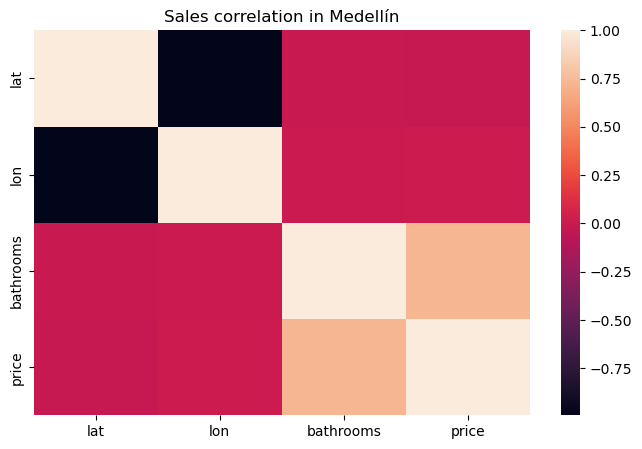

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


0-2                 11309
3-4                  5895
5 or more than 5      996
Name: bathroom_range, dtype: int64


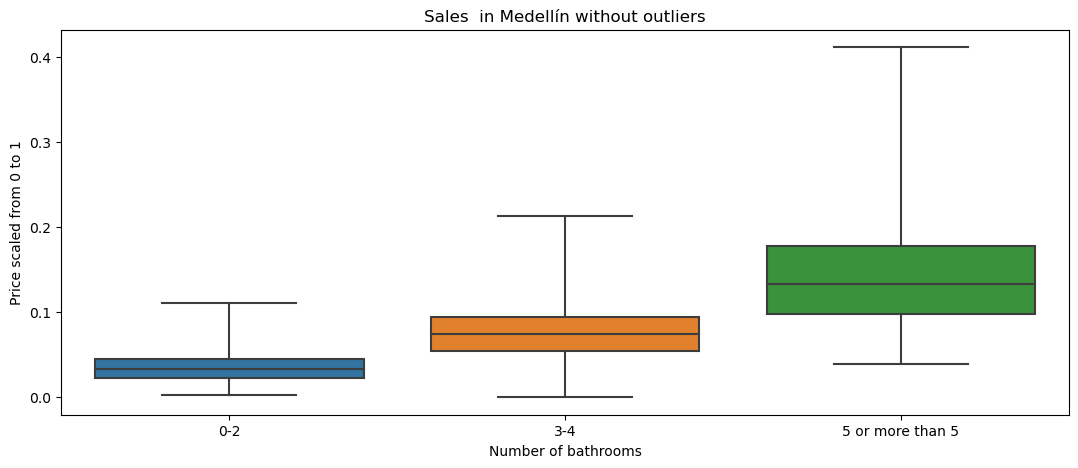

Accuracy using SVM-Linear: 0.7684065934065935
............................................................................................
............................................................................................


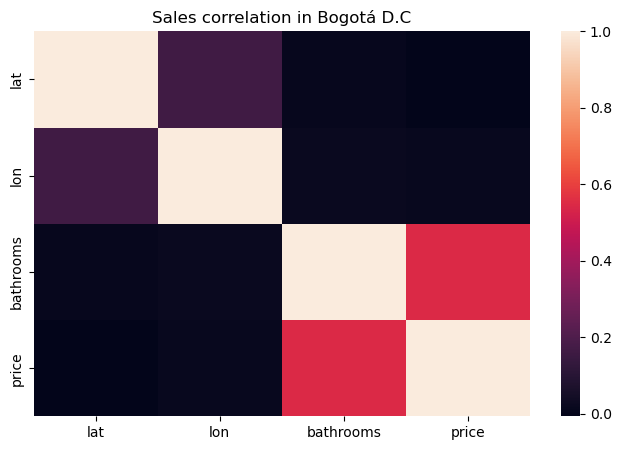

0-2                 26766
3-4                 15722
5 or more than 5     2279
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


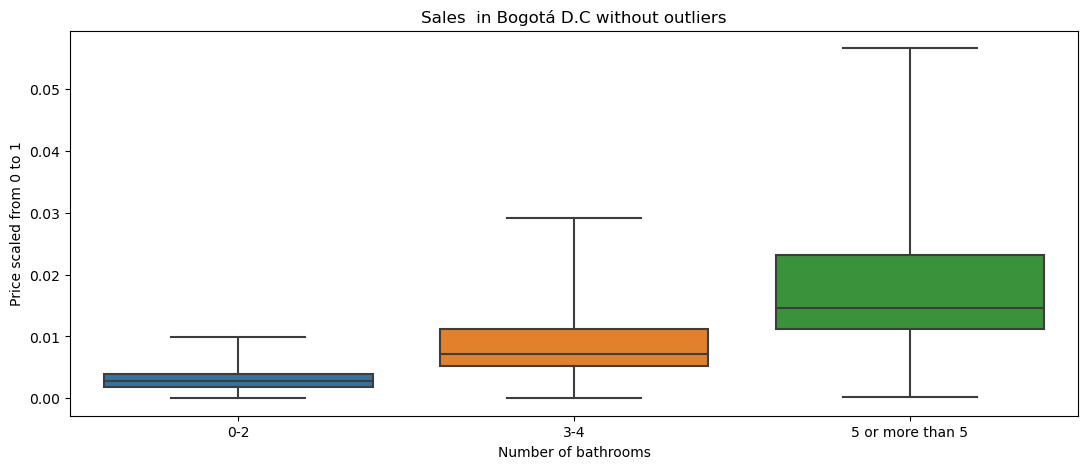

Accuracy using SVM-Linear: 0.6144739781103418
............................................................................................
............................................................................................


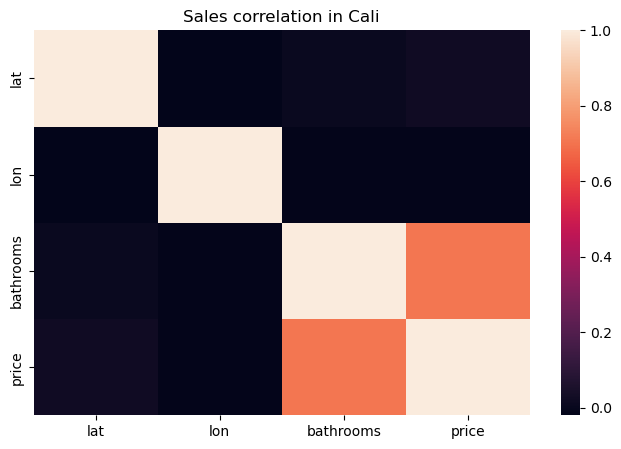

0-2                 14806
3-4                  7271
5 or more than 5     1067
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


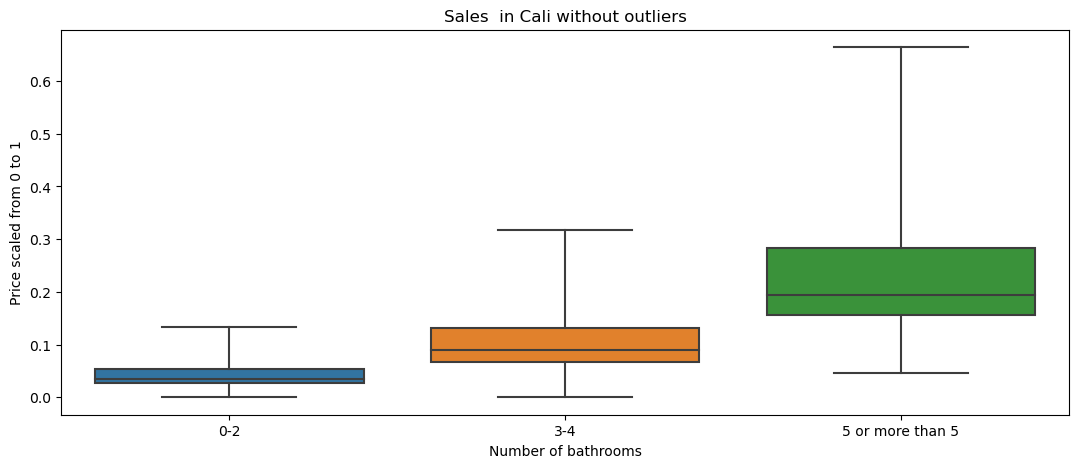

Accuracy using SVM-Linear: 0.7831065024843379
............................................................................................
............................................................................................


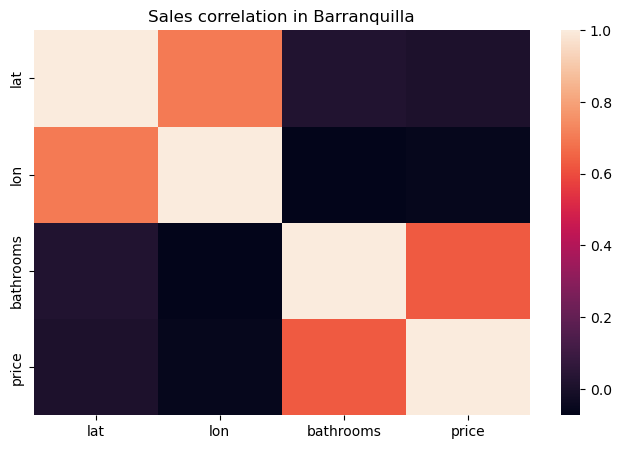

0-2                 10966
3-4                  6084
5 or more than 5      671
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


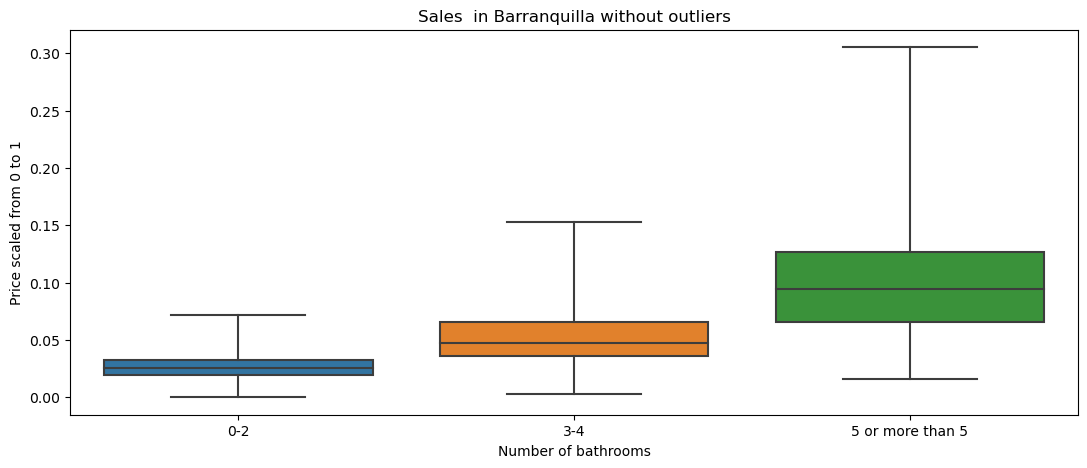

Accuracy using SVM-Linear: 0.7227080394922426
............................................................................................
............................................................................................


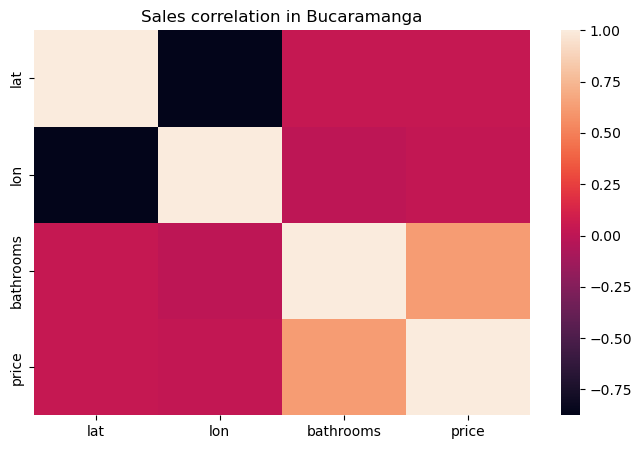

0-2                 5081
3-4                 1281
5 or more than 5      87
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


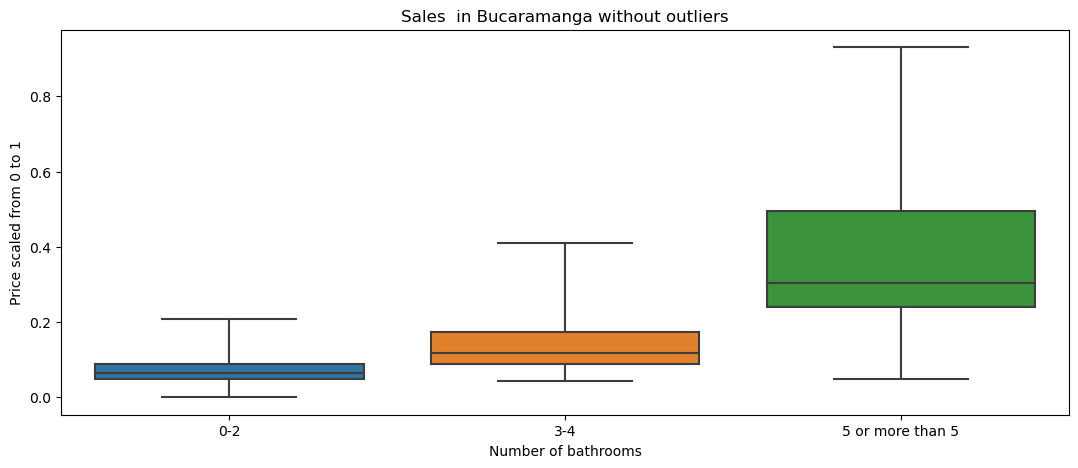

Accuracy using SVM-Linear: 0.8317829457364341
............................................................................................
............................................................................................


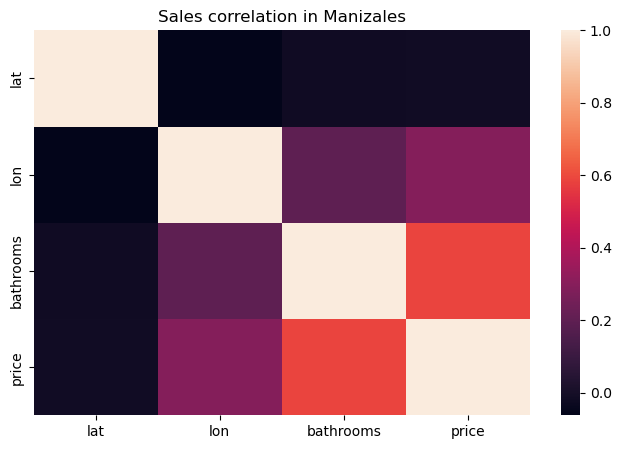

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


0-2                 10273
3-4                  1759
5 or more than 5       55
Name: bathroom_range, dtype: int64


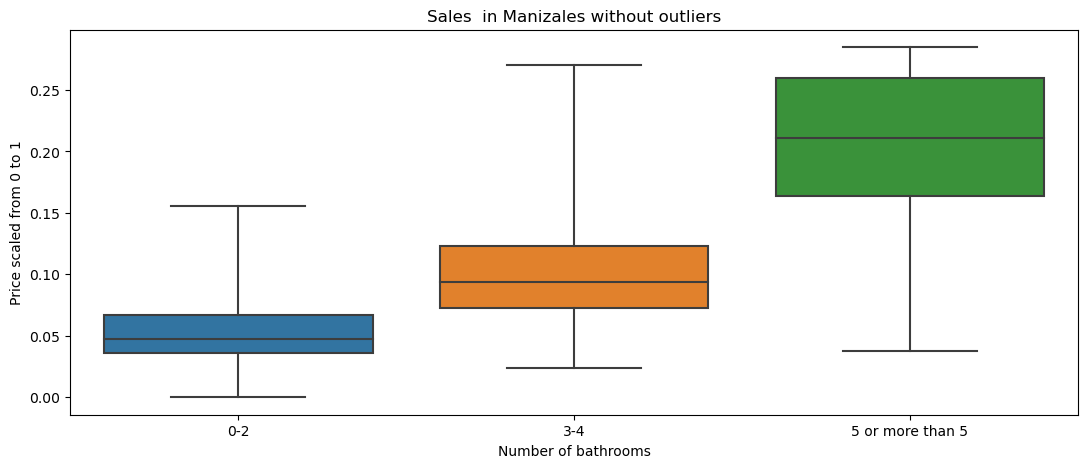

Accuracy using SVM-Linear: 0.8560794044665012
............................................................................................
............................................................................................


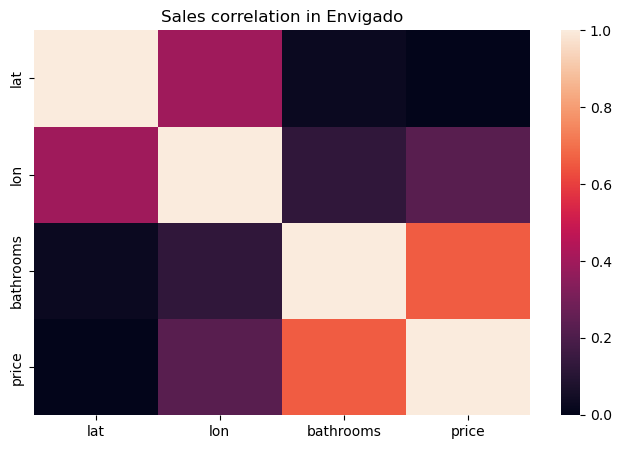

0-2                 3154
3-4                 1723
5 or more than 5     188
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


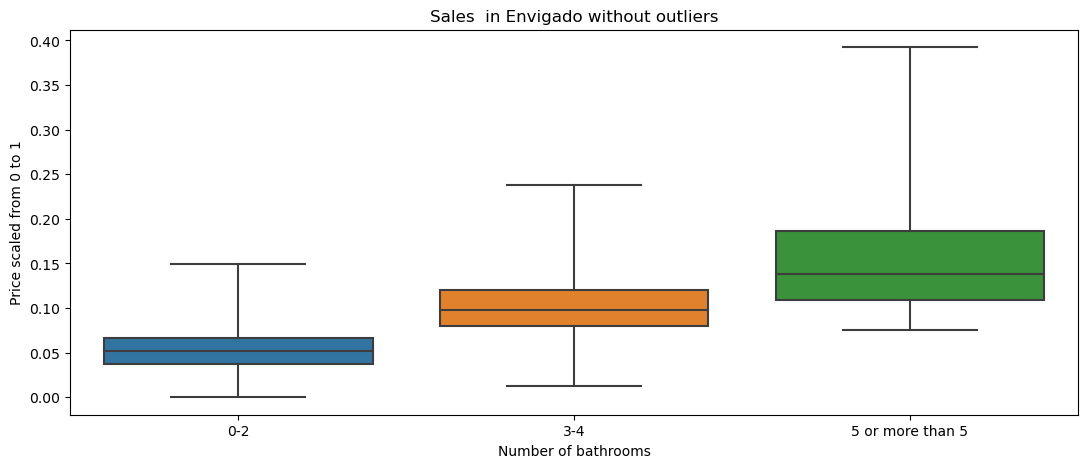

Accuracy using SVM-Linear: 0.7680157946692991
............................................................................................
............................................................................................


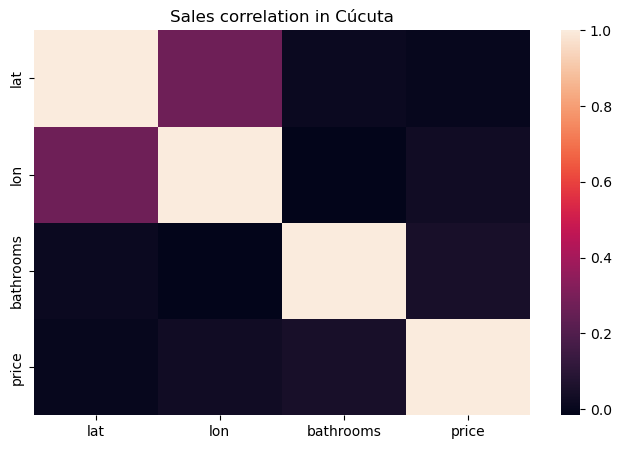

0-2                 2255
3-4                 1035
5 or more than 5      60
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


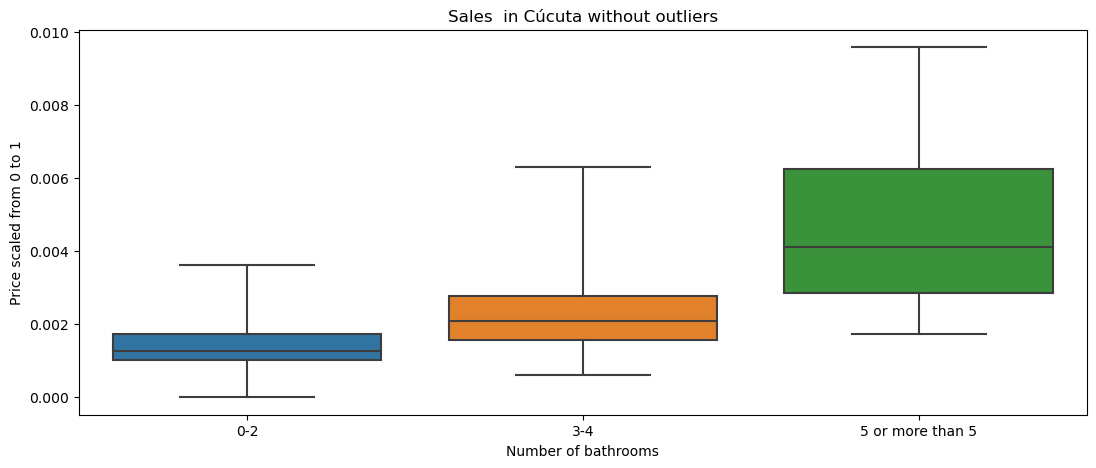

Accuracy using SVM-Linear: 0.6567164179104478
............................................................................................
............................................................................................


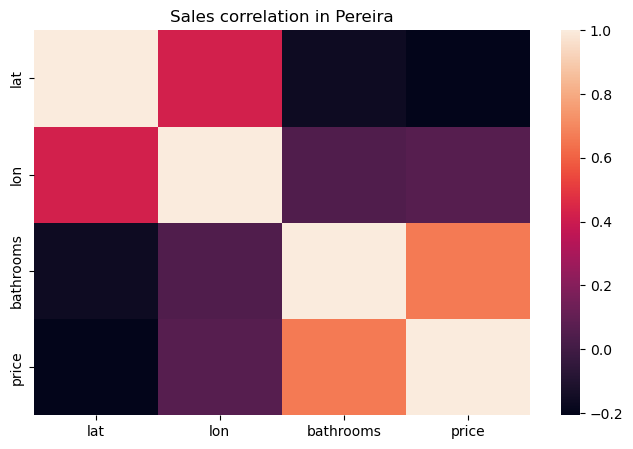

0-2                 2255
3-4                  669
5 or more than 5      53
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


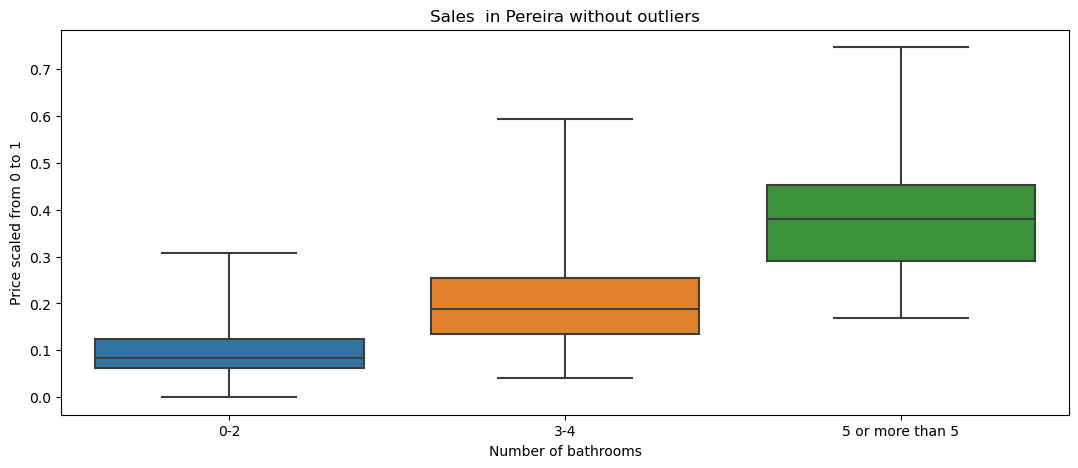

Accuracy using SVM-Linear: 0.8120805369127517
............................................................................................
............................................................................................


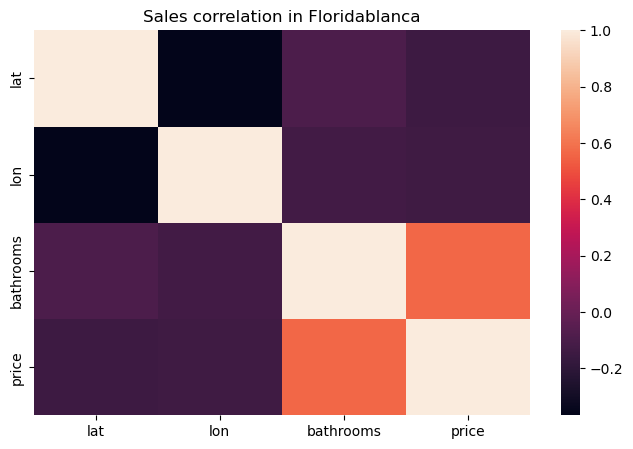

0-2                 1767
3-4                  292
5 or more than 5       6
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1743723276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


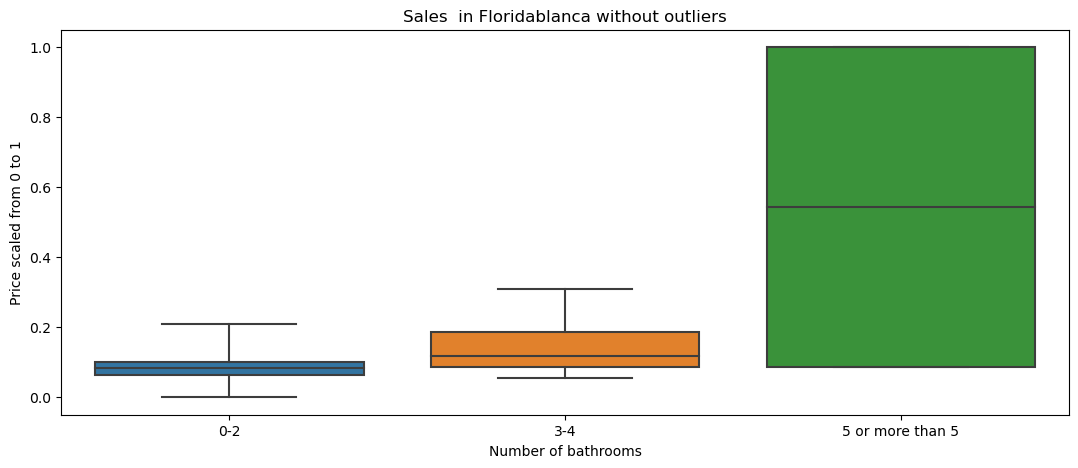

Accuracy using SVM-Linear: 0.8450363196125908
............................................................................................
............................................................................................


In [134]:
for city in cities:
    sales_data_city=sales_data[sales_data["l3"]==city]
    corr=sales_data_city.corr ()
    # plot the heatmap
    plt.rcParams["figure.figsize"] = (8,5)
    plt.title("Sales correlation"+" in "+ city)
    sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
    plt.show()
    X = sales_data_city[["price"]]
    y = sales_data_city["bathrooms"]
    # Define the range bins
    bins = [-0.1, 2.1, 4.1, 10000]
    labels=["0-2","3-4","5 or more than 5"]
    # Create a new column "bathroom_range" and assign it the values of the corresponding bin
    sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)
    y=sales_data_city['bathroom_range']
    # Display the counts of each bin
    print(sales_data_city['bathroom_range'].value_counts()) 
    X=X.values
    y=y.values
    X = min_max_scaler.fit_transform(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train a SVM model
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Predict on the testing set and calculate the accuracy
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    plt.rcParams["figure.figsize"] = (13,5)
    plt.title("Sales " + " in " + city+" without outliers")
    plt.xlabel("Number of bathrooms")
    plt.ylabel("Price scaled from 0 to 1")
    sns.boxplot(x=y, y=X[:,0],whis=3, sym='')
    plt.show()
    print("Accuracy using SVM-Linear:", accuracy)
    print("............................................................................................")
    print("............................................................................................")

#### Farms

In [137]:
farms=data[data["property_type"]=="Finca"]
farms

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
6753,LbLFgzfhX5ZrDDDIG1FdXA==,Propiedad,2020-11-28,9999-12-31,2020-11-28,6.277,-75.626,Colombia,Antioquia,Medellín,4.0,3.200000e+06,COP,Finca En Arriendo En Medellin Cod. APRB293257,"Finca en el corregimiento de san cristobal, ar...",Finca,Arriendo
9772,rONKFymmTWldc9MR8czM0Q==,Propiedad,2021-06-03,2021-07-12,2021-06-03,4.667,-74.010,Colombia,Cundinamarca,Bogotá D.C,5.0,2.050000e+09,COP,CASA CAMPESTRE EN VENTA EN LA CALERA,Casa con moderno diseño ubicada en lote con ...,Finca,Venta
12493,Q2AJmeexNX/dzICvM+sR6g==,Propiedad,2021-02-12,2021-03-27,2021-02-12,3.350,-76.535,Colombia,Valle del Cauca,Cali,5.0,2.100000e+09,COP,CASA CAMPESTRE EN VENTA EN CALI,HERMOSA casa campestre de 1 piso en Altos de c...,Finca,Venta
12591,rMU8Z7Eb7s1qH4Ec0Erp0g==,Propiedad,2021-02-12,2021-08-02,2021-02-12,3.343,-76.529,Colombia,Valle del Cauca,Cali,10.0,4.200000e+09,COP,CASA CAMPESTRE EN VENTA EN CALI,"Hermosa y moderna casa, lote 1.400 mts, constr...",Finca,Venta
19027,F3HS3q9kxI2jRgSGodTDjw==,Propiedad,2021-08-05,2021-08-23,2021-08-05,3.501,-76.604,Colombia,Valle del Cauca,Cali,1.0,3.200000e+08,COP,CASA CAMPESTRE EN VENTA EN CALI,Venta Casa campestre en la Elvira vereda laure...,Finca,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980136,Ch3YKcK0OPAdSiZVxj1Cfw==,Propiedad,2021-08-02,9999-12-31,2021-08-02,3.350,-76.535,Colombia,Valle del Cauca,Cali,5.0,2.600000e+09,COP,CASA CAMPESTRE EN VENTA EN CALI,HERMOSA casa campestre de 1 piso en Altos de c...,Finca,Venta
980926,6tX4AA0GI5EDNe5X2q5WJg==,Propiedad,2021-06-27,9999-12-31,2021-06-27,4.707,-74.031,Colombia,Cundinamarca,Bogotá D.C,9.0,5.000000e+09,COP,CASA CAMPESTRE EN VENTA EN Bogota,En Venta Exclusiva y única casa campestre dobl...,Finca,Venta
994896,MF+aRLqaYqC0mwV343CqFQ==,Propiedad,2021-03-06,9999-12-31,2021-03-06,3.448,-76.540,Colombia,Valle del Cauca,Cali,3.0,1.629000e+09,COP,CASA CAMPESTRE EN VENTA EN DAGUA,"Excelente casa finca en venta, rodeada de arbo...",Finca,Venta
996039,bUs94zOGhvZ3DEUtO+paSw==,Propiedad,2021-03-31,2021-04-28,2021-03-31,3.448,-76.621,Colombia,Valle del Cauca,Cali,3.0,2.700000e+06,COP,CASA CAMPESTRE EN ARRIENDO EN JAMUNDI,"94843, Hermosa casa campestre, parcelación col...",Finca,Arriendo


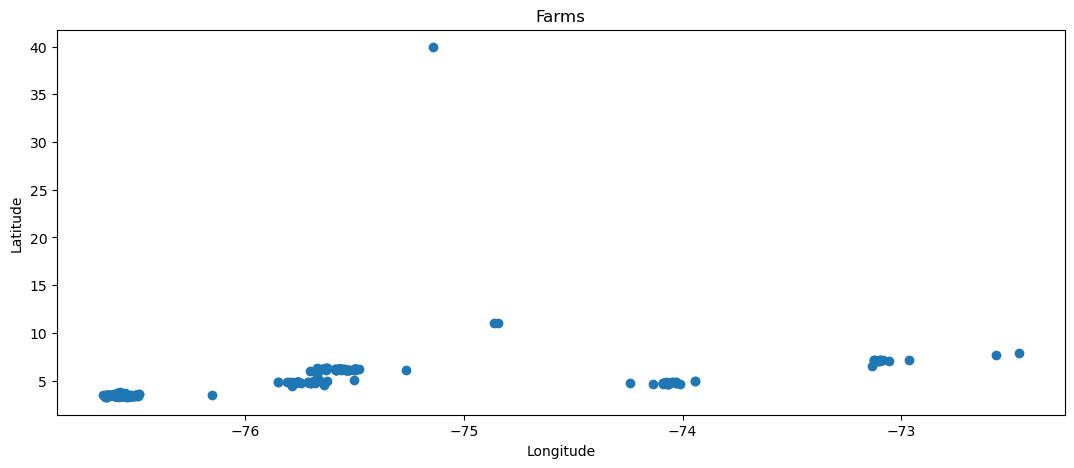

In [140]:
plt.title("Farms")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(farms["lon"],farms["lat"])

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


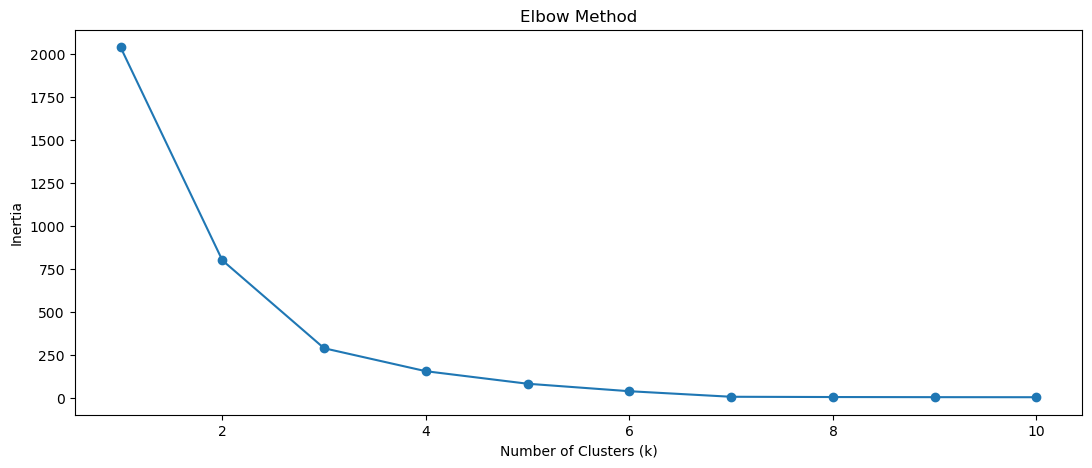

In [141]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filter data to only include farms
farms = data[data["property_type"] == "Finca"]

# Create an empty list to store the inertia values for each k
inertias = []

# Define a range of k values to test
k_values = range(1, 11)

# Loop through each k value and fit a KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(farms[["lon", "lat"]])
    
    # Append the inertia value to the list
    inertias.append(kmeans.inertia_)
    
# Plot the inertia values for each k value
plt.plot(k_values, inertias, "o-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

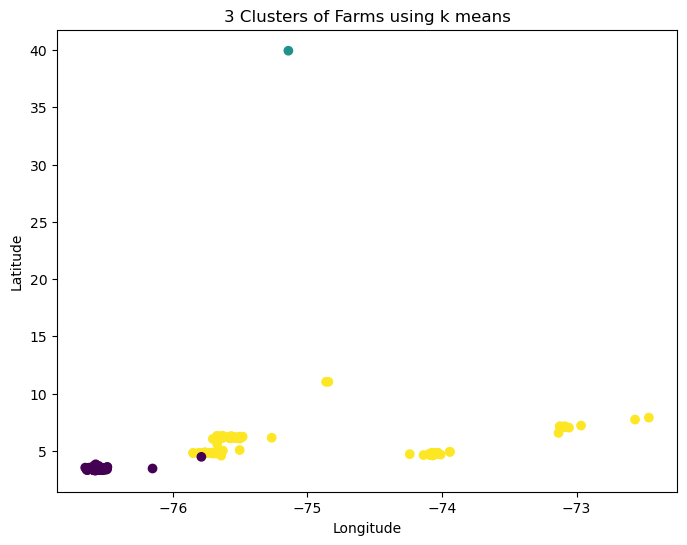

In [151]:
from sklearn.cluster import KMeans

# Filter data to only include farms
farms = data[data["property_type"] == "Finca"]

# Define the number of clusters to create
n_clusters = 3

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the farm data
kmeans.fit(farms[["lon", "lat"]])

# Get the labels for each farm point
labels = kmeans.labels_
# Plot the farms with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.title(f"{n_clusters} Clusters of Farms using k means")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(farms["lon"], farms["lat"], c=labels, cmap="viridis")
plt.show()

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9772\1038782235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farms["label_Kmeans"]=labels


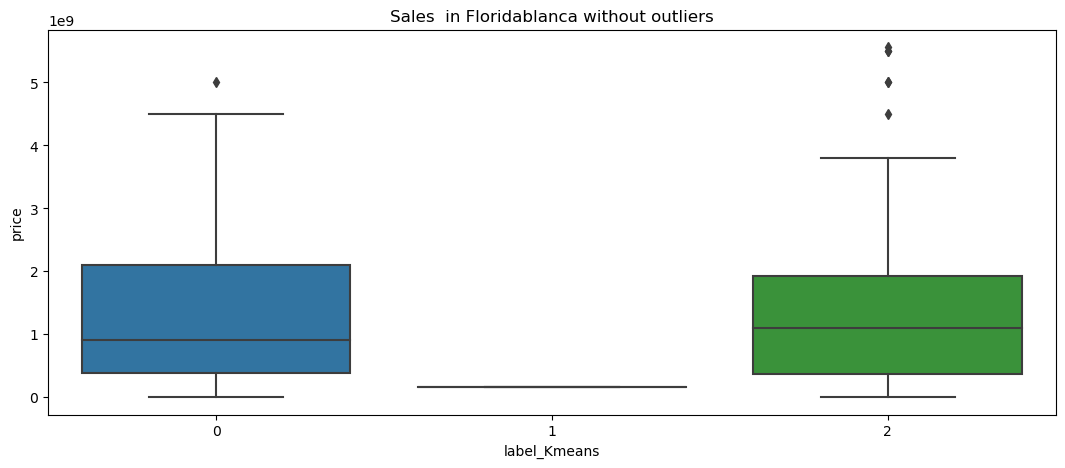

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,label_Kmeans
169417,fWh1NRVj7nSa0RKfuuzOdg==,Propiedad,2021-07-27,9999-12-31,2021-07-27,39.943521,-75.140996,Colombia,Cundinamarca,Bogotá D.C,2.0,160000000.0,COP,HERMOSA CASA CAMPESTRE EN SAN DIEGO CESAR 02,VENDO CASA CAMPESTRE EN SAN DIEGO CESAR TIENE ...,Finca,Venta,1


In [161]:
farms["label_Kmeans"]=labels
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales " + " in " + city+" without outliers")
plt.xlabel("Number of bathrooms")
plt.ylabel("Price scaled from 0 to 1")
sns.boxplot(x="label_Kmeans", y="price",data= farms)
plt.show()
farms[farms["label_Kmeans"]==1]